# How Hurricanes Effect Salinity Levels in Miami

## Import: 

This first step in any python project is to import important modules that can be used to analyze and visualize data. 
That is exactly what this section is accomplishing.

In [2]:
#Import libraries 
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pylab as plt
from scipy import stats
import os
import zipfile
from urllib.request import urlretrieve
import seaborn as sns

## Read in Data:

Loading in salinity level data from the USGS website using Pandas read in CSV file command. This allows us to work with the data in python. We also added another column specifying the units of the salinity data.

In [3]:

# Replace '1_data/CDAT_Long-term salinity data_1.csv' with the path to your CSV file
file_path = '1_data/CDAT_Long-term salinity data_1.csv'

# Define the row number from which you want to start reading (e.g., row 22)
start_row = 22

# Define column names
column_names = ['SITE', 'DATE', 'SALINITY']

# Read the CSV file into a DataFrame, skipping rows before the start_row and specifying column names
df = pd.read_csv(file_path, skiprows=range(1, start_row), names=column_names)

# Add a new column for units of salinity (assuming ppt)
df['SALINITY_UNITS'] = 'ppt'

# Display the DataFrame
display(df)


,SITE,DATE,SALINITY,SALINITY_UNITS
0,NaN,NaN,NaN,ppt
1,2.508021e+14,2009-02-20,34.0,ppt
2,2.508021e+14,2009-02-21,35.0,ppt
3,2.508021e+14,2009-02-22,34.0,ppt
4,2.508021e+14,2009-02-23,34.0,ppt
...,...,...,...,...
4537,2.508021e+14,2024-04-05,28.0,ppt
4538,2.508021e+14,2024-04-06,28.0,ppt
4539,2.508021e+14,2024-04-07,27.0,ppt
4540,2.508021e+14,2024-04-08,30.0,ppt


## Cleaning data:

Now it is time to clean up our data. We drop out the "SITE" column because it does not help with the analysis. Also, we cut out the the NaN values so we dont get any errors when graphing.

NOTE: After looking into the data that the "NaN" values correlate to, they are text values thus cutting them out will not effect the data.

Then we convert index to date-time, allowing us  to work through data more easily.

In [4]:
# Drop the 'SITE' column
df.drop(columns=['SITE'], inplace=True)

# Convert the 'DATE' column to datetime index
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Slice the DataFrame to select specific date range, if needed
# For example:
# df = df['2022-01-01':'2022-12-31']

# Remove rows with NaN values
df = df.dropna()

# Display the cleaned DataFrame
display(df)

,SALINITY,SALINITY_UNITS
DATE,,
2009-02-20,34.0,ppt
2009-02-21,35.0,ppt
2009-02-22,34.0,ppt
2009-02-23,34.0,ppt
2009-02-24,34.0,ppt
...,...,...
2024-04-05,28.0,ppt
2024-04-06,28.0,ppt
2024-04-07,27.0,ppt


## Filter Through Dates:

We now must filter through the data by dates. Converting the index to date-time formatt helps with this. We end up with the specific dates we require.

In [5]:
# Filter data from January 1, 2020, to January 1, 2024, using index
df_filtered = df['2020-01-01':'2024-01-01']

# Save the filtered DataFrame to a new CSV file
file_path_filtered = 'filtered_data.csv'
df_filtered.to_csv(file_path_filtered)

# Display the filtered DataFrame
display(df_filtered)


,SALINITY,SALINITY_UNITS
DATE,,
2020-01-01,32.0,ppt
2020-01-02,32.0,ppt
2020-01-03,32.0,ppt
2020-01-04,33.0,ppt
2020-01-05,32.0,ppt
...,...,...
2023-12-22,28.0,ppt
2023-12-23,29.0,ppt
2023-12-24,29.0,ppt


## Graph All Data:

We abtained dates from 2020 to 2023 and now we wanted to visualize what salinity does over the 3 year time span.

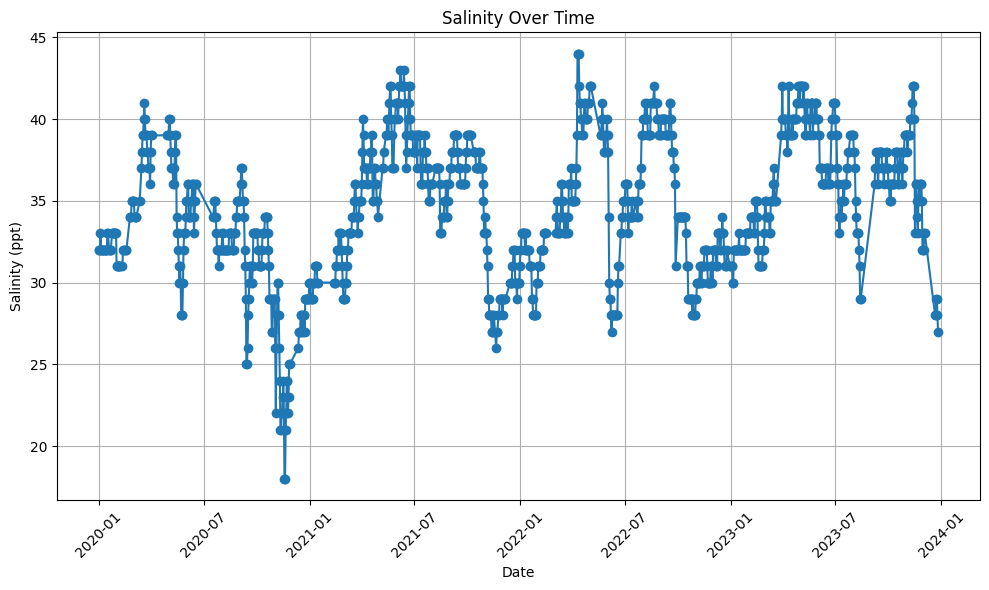

In [6]:

# Plot line graph
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, df_filtered['SALINITY'], marker='o', linestyle='-')
plt.title('Salinity Over Time')
plt.xlabel('Date')
plt.ylabel('Salinity (ppt)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Graphed Data for Hurricane Nicole:

Now to work specifically with Hurricane Nicole. First, need to filter through more dates to "zoom" into the time frame Nicole hit Florida.  This helps us visually depict the dynamic relationship between hurricanes and salinity levels.

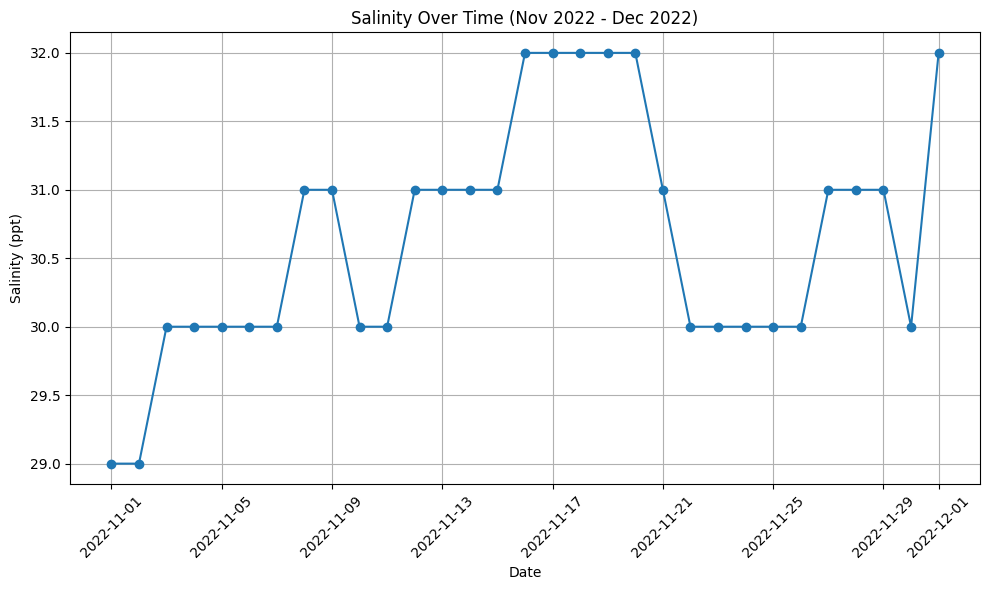

In [7]:
# Filter data for the specific date range
df_zoomed = df_filtered['2022-11-01':'2022-12-01']

# Plot line graph for the zoomed-in date range
plt.figure(figsize=(10, 6))
plt.plot(df_zoomed.index, df_zoomed['SALINITY'], marker='o', linestyle='-')
plt.title('Salinity Over Time (Nov 2022 - Dec 2022)')
plt.xlabel('Date')
plt.ylabel('Salinity (ppt)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Graphed Data for Hurricane Ian:

Now to work specifically with Hurricane Ian. First, need to filter through more dates to "zoom" into the time frame Ian hit Florida. This helps us visually depict the dynamic relationship between hurricanes and salinity levels.

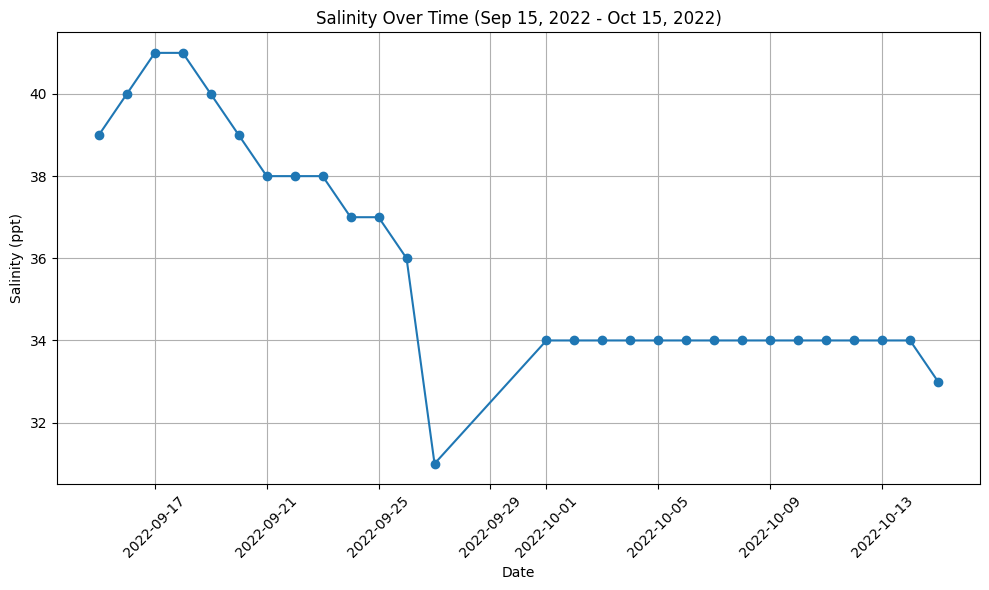

In [8]:
# Filter data for the specific date range
df_zoomed = df_filtered['2022-09-15':'2022-10-15']

# Plot line graph for the zoomed-in date range
plt.figure(figsize=(10, 6))
plt.plot(df_zoomed.index, df_zoomed['SALINITY'], marker='o', linestyle='-')
plt.title('Salinity Over Time (Sep 15, 2022 - Oct 15, 2022)')
plt.xlabel('Date')
plt.ylabel('Salinity (ppt)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Graphed Data for Hurricane Nicole and Ian:

Lastly, we want to graph the data for both Hurricane Nicole and Ian. First, we filtered through more dates to "zoom" into the time frames Nicole and Ian hit Florida. 

We then use dashed red lines to represent the time of landfall for Nicole and dashed blue lines for the time of landfall for Ian. This helps us visually depict the dynamic relationship between hurricanes and salinity levels, correlating to the time and place of landfall.

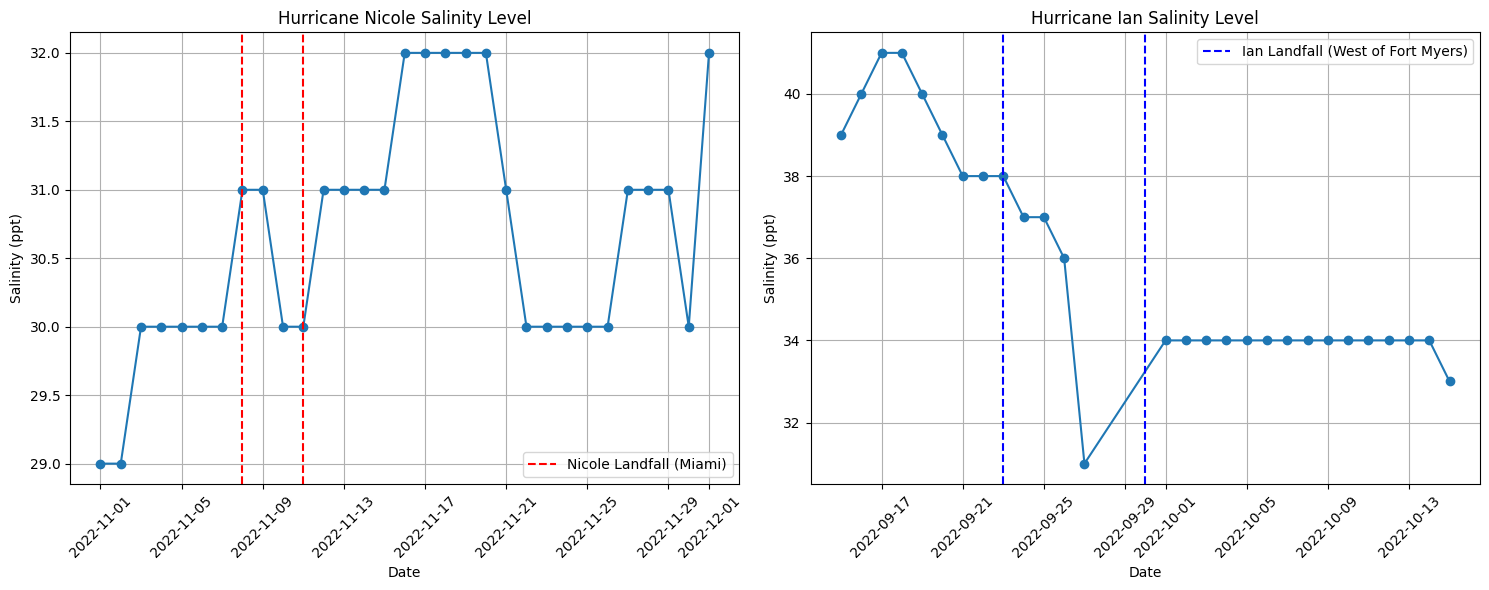

In [9]:
import datetime

# Filter data for the specific date range for Hurricane Nicole
df_nicole_zoomed = df_filtered['2022-11-01':'2022-12-01']

# Filter data for the specific date range for Hurricane Ian
df_ian_zoomed = df_filtered['2022-09-15':'2022-10-15']

# Plot line graph for Hurricane Nicole and Hurricane Ian Salinity Levels
plt.figure(figsize=(15, 6))

# Plot for Hurricane Nicole Salinity Level
plt.subplot(1, 2, 1)
plt.plot(df_nicole_zoomed.index, df_nicole_zoomed['SALINITY'], marker='o', linestyle='-')
plt.title('Hurricane Nicole Salinity Level')
plt.xlabel('Date')
plt.ylabel('Salinity (ppt)')
plt.grid(True)
plt.xticks(rotation=45)
# Add vertical bars for Nicole's landfall in Miami
plt.axvline(x=datetime.datetime(2022, 11, 8), color='red', linestyle='--', label='Nicole Landfall (Miami)')
plt.axvline(x=datetime.datetime(2022, 11, 11), color='red', linestyle='--')
plt.legend()

# Plot for Hurricane Ian Salinity Level
plt.subplot(1, 2, 2)
plt.plot(df_ian_zoomed.index, df_ian_zoomed['SALINITY'], marker='o', linestyle='-')
plt.title('Hurricane Ian Salinity Level')
plt.xlabel('Date')
plt.ylabel('Salinity (ppt)')
plt.grid(True)
plt.xticks(rotation=45)
# Add vertical bars for Ian's landfall west of Fort Myers
plt.axvline(x=datetime.datetime(2022, 9, 23), color='blue', linestyle='--', label='Ian Landfall (West of Fort Myers)')
plt.axvline(x=datetime.datetime(2022, 9, 30), color='blue', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()


## Discussion of findings:

Hurricanes exert a dynamic influence on surface water salinity levels, triggering fluctuations characterized by rises and falls. The onset of a hurricane typically prompts salinity levels to increase, propelled by freshwater rainfall and storm surge. As rainwater mixes with seawater and storm surges push saline water inland, salinity levels experience an initial surge. However, as the hurricane progresses, intense rainfall can lead to dilution, causing salinity levels to decline temporarily. Post-hurricane, salinity levels gradually return to baseline as the effects of storm surge diminish and freshwater runoff dissipates. This dynamic interplay underscores the intricate relationship between hurricanes and coastal salinity dynamics, with implications for ecosystem health and water resource management in affected regions.

This was possible to depict using Python and working through data.